In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import glob
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from utils.utils import generate_results_csv
from utils.utils import create_directory
from utils.utils import read_dataset
from utils.utils import transform_mts_to_ucr_format
from utils.utils import visualize_filter
from utils.utils import viz_for_survey_paper
from utils.utils import viz_cam
import os
import numpy as np
import sys
import sklearn
import utils
from utils.constants import CLASSIFIERS
from utils.constants import ARCHIVE_NAMES
from utils.constants import ITERATIONS
classes=['air','mine','coin','pin','stone','fibersheet']
metals=['coin','pin','mine']

2021-09-28 16:23:29.002605: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
path ='/home/saad/mine detector/' # use your path
all_files = glob.glob(path + "/*.csv")

def correction (x,y):
#     if x>16408 and x <53846:
#         y=y+1024
         #if x==41
    return y
# 16408
# 53846
count=0
air_p=[]
air_n=[]
stone_p=[]
stone_n=[]
fs_p=[]
fs_n=[]
heavy_p=[]
heavy_n=[]
coin_p=[]
coin_n=[]
mine_p=[]
mine_n=[]
pin_p=[]
pin_n=[]
for i in all_files:
    print(i)
    if 'air' in i[-30:].split('\\')[-1]:
        air=pd.read_csv(i)
        air_p.append(air.iloc[:,0])
        air_n.append(air.iloc[:,1])
    if 'coin' in i[-30:].split('\\')[-1]:
        coin=pd.read_csv(i)
        coin_p.append(coin.iloc[:,0])
        coin_n.append(coin.iloc[:,1])
        print("coin")
    if 'fibersheet' in i[-30:].split('\\')[-1]:
        fs=pd.read_csv(i)
        fs_p.append(fs.iloc[:,0])
        fs_n.append(fs.iloc[:,1])
    if 'heavy' in i[-30:].split('\\')[-1]:
        h=pd.read_csv(i)
        heavy_p.append(h.iloc[:,0])
        heavy_n.append(h.iloc[:,1])
    if 'mine' in i[-30:].split('\\')[-1]:
        m=pd.read_csv(i)
        mine_p.append(m.iloc[:,0])
        mine_n.append(m.iloc[:,1])
       
    if 'pin' in i[-30:].split('\\')[-1]:
        p=pd.read_csv(i)
        pin_p.append(p.iloc[:,0])
        pin_n.append(p.iloc[:,1])
        
    if 'stone' in i[-30:].split('\\')[-1]:
        s=pd.read_csv(i)
        stone_p.append(s.iloc[:,0])
        stone_n.append(s.iloc[:,1])
    
air_p=np.array(air_p).flatten()
coin_p=np.array(coin_p).flatten()
mine_p=np.array(mine_p).flatten()
fs_p=np.array(fs_p).flatten()
stone_p=np.array(stone_p).flatten()
pin_p=np.array(pin_p).flatten()
heavy_p=np.array(heavy_p).flatten()
air_n=np.array(air_n).flatten()
coin_n=np.array(coin_n).flatten()
mine_n=np.array(mine_n).flatten()
fs_n=np.array(fs_n).flatten()
stone_n=np.array(stone_n).flatten()
pin_n=np.array(pin_n).flatten()
heavy_n=np.array(heavy_n).flatten()


In [ ]:
# df=pd.DataFrame(({'1':heavy_p, '2':heavy_n})).to_csv(r'C:\Users\PC\Desktop\latest 5.2 data\new\heavy.csv')
df=pd.DataFrame(({'1':stone_p, '2':stone_n})).to_csv('/home/saad/latest 5.2 data/new/stone.csv')
df=pd.DataFrame(({'1':mine_p, '2':mine_n})).to_csv('/home/saad/latest 5.2 data/new/mine.csv')
df=pd.DataFrame(({'1':pin_p, '2':pin_n})).to_csv('/home/saad/latest 5.2 data/new/pin.csv')
df=pd.DataFrame(({'1':coin_p, '2':coin_n})).to_csv('/home/saad/latest 5.2 data/new/coin.csv')
df=pd.DataFrame(({'1':air_p, '2':air_n})).to_csv('/home/saad/latest 5.2 data/new/air.csv')
df=pd.DataFrame(({'1':fs_p, '2':fs_n})).to_csv('/home/saad/latest 5.2 data/new/fibersheet.csv')

In [ ]:
data=pd.read_csv('/home/saad/latest 5.2 data/new/air.csv')

In [ ]:
l=list(data.loc[:,'1'])

In [2]:
metals=['coin','pin','mine']

WITH AUGMENTATION

In [ ]:
# file_n=all_files[0][-30:].split('/')[-1]
# print(file_n)
# if file_n.split(".")[0] in metals:
#     print ("yes")

In [27]:
path = '/home/saad/latest 5.2 data/new' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for a in all_files:
    print(a)
    data=pd.read_csv(a)

    list_cord=list(data.loc[:,'1'])
#     list_cord=list_cord[200:]
    diff=[]
    peak=[]
    peak1=[]
    l_50=[]
    collect={}
    i=57
    peaklen=155
    w=1
    while i <len(list_cord):
        if list_cord[i]>55000:
            for g in range(0,16):
                i_new_start = i-35
                i_new_end = i+120
                peak=list_cord[i_new_start-g:i_new_end-g]
                peak1=list_cord[i_new_start+g:i_new_end+g]
            #print(i_new_start,i_new_end)

 
            #print(w)
            #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))
                if len(peak)<peaklen:
                    d=peaklen-len(peak)

                    for f in range(0,d):
                        peak.append(peak[-1:][0])
                if len(peak1)<peaklen:
                    d=peaklen-len(peak1)

                    for f in range(0,d):
                        peak1.append(peak1[-1:][0])                  
                #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))
                if g==0:
                    collect[w]=peak
                    w=w+1
                else:
                    collect[w]=peak
                    collect[w+1]=peak1
                    w=w+2
            i=i+165
        i=i+1
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    #dump.iloc[:,:].plot()
    print(dump.shape)
    file_n=all_files[count][-30:].split('/')[-1]
    #print(file_n)
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    
    if file_n.split(".")[0] in metals:
        print("metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/new/metal/positives//'+file_n,header=False)
        count=count+1
    else:
        print("non-metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/new/non-metal/positives//'+file_n,header=False)
        count=count+1


/home/saad/latest 5.2 data/new/pin.csv
(155, 92132)
metal
/home/saad/latest 5.2 data/new/air.csv
(155, 93000)
non-metal
/home/saad/latest 5.2 data/new/fibersheet.csv
(155, 93000)
non-metal
/home/saad/latest 5.2 data/new/stone.csv
(155, 93000)
non-metal
/home/saad/latest 5.2 data/new/mine.csv
(155, 124000)
metal
/home/saad/latest 5.2 data/new/coin.csv
(155, 93000)
metal


In [28]:
len(collect)

93000

In [29]:
path = '/home/saad/latest 5.2 data/new' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for a in all_files:
    print(a)
    data=pd.read_csv(a)

    list_cord=list(data.loc[:,'2'])
    peak=[]
    peak1=[]
    collect={}
    i=65
    peaklen=140
    w=1
    while i <len(list_cord):
        if list_cord[i]>55000:
            i_new_start=i-50
            i_new_end=i+90
            for g in range(0,16):
  
                peak=list_cord[i_new_start-g:i_new_end-g]
                peak1=list_cord[i_new_start+g:i_new_end+g]
            #print(i_new_start,i_new_end)


            #print(w)
            #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))
                if len(peak)<peaklen:
                    d=peaklen-len(peak)

                    for f in range(0,d):
                        peak.append(peak[-1:][0])
                if len(peak1)<peaklen:
                    d=peaklen-len(peak1)

                    for f in range(0,d):
                        peak1.append(peak1[-1:][0])                  
                #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))
                if g==0:
                    collect[w]=peak
                    w=w+1
                else:
                    collect[w]=peak
                    collect[w+1]=peak1
                    w=w+2
            i=i+135
        i=i+1
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    file_n=all_files[count][-30:].split('/')[-1]
    if file_n.split(".")[0] in metals:
        print("metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/new/metal/negatives//'+file_n,header=False)
        count=count+1
    else:
        print("non-metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/new/non-metal/negatives//'+file_n,header=False)
        count=count+1

/home/saad/latest 5.2 data/new/pin.csv
metal
/home/saad/latest 5.2 data/new/air.csv
non-metal
/home/saad/latest 5.2 data/new/fibersheet.csv
non-metal
/home/saad/latest 5.2 data/new/stone.csv
non-metal
/home/saad/latest 5.2 data/new/mine.csv
metal
/home/saad/latest 5.2 data/new/coin.csv
metal


In [3]:
classes=['air','mine','coin','pin','stone','fibersheet']

In [2]:
path_mp = '/home/saad/latest 5.2 data/new/metal/positives' # use your path
all_files_mp = glob.glob(path_mp + "/*.csv")
path_np = '/home/saad/latest 5.2 data/new/non-metal/positives' # use your path
all_files_np = glob.glob(path_np + "/*.csv")
path_mn = '/home/saad/latest 5.2 data/new/metal/negatives' # use your path
all_files_mn = glob.glob(path_mn + "/*.csv")
path_nn = '/home/saad/latest 5.2 data/new/non-metal/negatives' # use your path
all_files_nn = glob.glob(path_nn + "/*.csv")
df_mp=[]
df_np=[]
df_mn=[]
df_nn=[]
positive_metal={}
negative_metal={}
positive_non={}
negative_non={}
count=0
for i,j in zip(all_files_mp,all_files_mn):
    print(i,j)
    s1=str(all_files_mp[count][-30:].split('/')[-1])
    s2=str(all_files_mn[count][-30:].split('/')[-1])
    print(s1,s2)
    c1=[x for x in classes if s1.split('.')[0] in x][0]
    c2=[x for x in classes if s2.split('.')[0] in x][0]
    print(c1,c2)

    metal_pos=pd.read_csv(i)
    metal_neg=pd.read_csv(j)

    print(metal_pos.shape,metal_neg.shape)

    metal_pos=metal_pos.drop(columns=[metal_pos.columns[0]],axis=1).transpose()
    metal_neg=metal_neg.drop(columns=[metal_neg.columns[0]],axis=1).transpose()
    m_p=[]
    m_n=[]

    for a in range(0,metal_pos.shape[0]):
        m_p.append(c1)
    for a in range(0,metal_neg.shape[0]):
        m_n.append(c2)
    metal_pos['Material']=m_p
    metal_neg['Material']=m_n
    df_mp.append(metal_pos)
    df_mn.append(metal_neg)
    count=count+1
    

count1=0
for i,j in zip(all_files_np,all_files_nn):
    print(i,j)

    non_pos=pd.read_csv(i)
    non_neg=pd.read_csv(j)
    s3=str(all_files_np[count1][-30:].split('/')[-1])
    s4=str(all_files_nn[count1][-30:].split('/')[-1])
    print(s3,s4)
    c3=[x for x in classes if s3.split('.')[0] in x][0]
    c4=[x for x in classes if s4.split('.')[0] in x][0]
    print(c3,c4)
    non_pos=non_pos.drop(columns=[non_pos.columns[0]],axis=1).transpose()
    non_neg=non_neg.drop(columns=[non_neg.columns[0]],axis=1).transpose()

    m_p=[]
    m_n=[]

    for a in range(0,non_pos.shape[0]):
        m_p.append(c3)
    for a in range(0,non_neg.shape[0]):
        m_n.append(c4)
    non_pos['Material']=m_p
    non_neg['Material']=m_n

    df_np.append(non_pos)
    df_nn.append(non_neg)

    positive_non={}
    negative_non={}
    count1=count1+1
data_mp=pd.concat(df_mp, axis=0, ignore_index=True)
data_np=pd.concat(df_np,axis=0,ignore_index=True)
data_mn=pd.concat(df_mn,axis=0,ignore_index=True)
data_nn=pd.concat(df_nn,axis=0,ignore_index=True)
print(data_np.shape,data_mp.shape)
print(data_mn.shape,data_nn.shape)
data_fp=pd.concat([data_mp,data_np],axis=0,ignore_index=True)
data_fn=pd.concat([data_mn,data_nn],axis=0,ignore_index=True)

/home/saad/latest 5.2 data/new/metal/positives/pin.csv /home/saad/latest 5.2 data/new/metal/negatives/pin.csv
pin.csv pin.csv
pin pin
(154, 92133) (139, 93001)
/home/saad/latest 5.2 data/new/metal/positives/mine.csv /home/saad/latest 5.2 data/new/metal/negatives/mine.csv
mine.csv mine.csv
mine mine
(154, 124001) (139, 124001)
/home/saad/latest 5.2 data/new/metal/positives/coin.csv /home/saad/latest 5.2 data/new/metal/negatives/coin.csv
coin.csv coin.csv
coin coin
(154, 93001) (139, 93001)
/home/saad/latest 5.2 data/new/non-metal/positives/air.csv /home/saad/latest 5.2 data/new/non-metal/negatives/air.csv
air.csv air.csv
air air
/home/saad/latest 5.2 data/new/non-metal/positives/fibersheet.csv /home/saad/latest 5.2 data/new/non-metal/negatives/fibersheet.csv
fibersheet.csv fibersheet.csv
fibersheet fibersheet
/home/saad/latest 5.2 data/new/non-metal/positives/stone.csv /home/saad/latest 5.2 data/new/non-metal/negatives/stone.csv
stone.csv stone.csv
stone stone
(279000, 155) (309132, 155

In [15]:
# Xp1=Xp*1
# Xp2=Xp*2
# Xp3=Xp*3
# X3=pd.concat([Xp1,Xp2,Xp3])
# X3.shape

In [3]:
Xp=data_fp.iloc[:,0:-1]
yp=data_fp.iloc[:,-1]
Xn=data_fn.iloc[:,0:-1]
yn=data_fn.iloc[:,-1]

In [17]:
2352528/588132

4.0

In [4]:
def my_Test_train(X,y,test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42,shuffle=True)
    print(f'Train X = {X_train.shape}\tTrain y = {y_train.shape}\tTest X = {X_test.shape}\tTest y = {y_test.shape}')
    return (X_train, X_test, y_train, y_test)
    
Xp_train1=[]
yp_train1=[]
i=0.8
while i < 1.36:
    Xp_train1.append(Xp*i)
    yp_train1.append(yp)
    i=i+0.01
xp1=pd.concat(Xp_train1,axis=0,ignore_index=True)
yp1=pd.concat(yp_train1,axis=0,ignore_index=True)
    



In [19]:
x_train,x_test,y_train,y_test=my_Test_train(xp1,yp1,0.3)

Train X = (23054774, 154)	Train y = (23054774,)	Test X = (9880618, 154)	Test y = (9880618,)


In [20]:
from utils.utils import generate_results_csv
from utils.utils import create_directory
from utils.utils import read_dataset
from utils.utils import transform_mts_to_ucr_format
from utils.utils import visualize_filter
from utils.utils import viz_for_survey_paper
from utils.utils import viz_cam
import os
import numpy as np
import sys
import sklearn
import utils
from utils.constants import CLASSIFIERS
from utils.constants import ARCHIVE_NAMES
from utils.constants import ITERATIONS

In [21]:
from classifiers import resnet
path_p='/home/saad/aug_positive/'
# classifier1=resnet.Classifier_RESNET(path_p, input_shape, nb_classes, verbose)

Number of devices: 10


2021-09-24 18:25:12.401263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1a:00.0
2021-09-24 18:25:12.403811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1b:00.0
2021-09-24 18:25:12.405157: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1c:00.0
2021-09-24 18:25:12.406481: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1d:00.0
2021-09-24 18:25:12.407814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
na

In [22]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
y_train=np.array(y_train)
x_train=np.array(x_train).astype('float')
x_test=np.array(x_test).astype('float')
y_test=np.array(y_test)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_train.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))



In [23]:
input_shape = x_train.shape[1:]
classifier1=resnet.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=True)
# classifier = create_classifier(classifier_name, input_shape, nb_classes, output_directory)

classifier1.fit(x_train, y_train, x_test, y_test, y_true,20,500)

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

,precision,accuracy,recall,duration
0,1.0,1.0,1.0,38082.239559


In [7]:
def my_Test_train(X,y,test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42,shuffle=True)
    print(f'Train X = {X_train.shape}\tTrain y = {y_train.shape}\tTest X = {X_test.shape}\tTest y = {y_test.shape}')
    return (X_train, X_test, y_train, y_test)
    
Xp_train1=[]
yp_train1=[]
i=0.8
while i < 1.36:
    Xp_train1.append(Xn*i)
    yp_train1.append(yn)
    i=i+0.01
xp1=pd.concat(Xp_train1,axis=0,ignore_index=True)
yp1=pd.concat(yp_train1,axis=0,ignore_index=True)
    




In [8]:
x_train,x_test,y_train,y_test=my_Test_train(xp1,yp1,0.3)

Train X = (23088800, 139)	Train y = (23088800,)	Test X = (9895200, 139)	Test y = (9895200,)


In [10]:
from classifiers import resnet
path_p='/home/saad/aug_negative/'

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7', '/job:localhost/replica:0/task:0/device:GPU:8', '/job:localhost/replica:0/task:0/device:GPU:9')
Number of devices: 10


2021-09-28 16:41:04.526203: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-28 16:41:04.529708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:1a:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-09-28 16:41:04.532916: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:1b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-09-28 16:41:04.536016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:1c:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidt

In [11]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
y_train=np.array(y_train)
x_train=np.array(x_train).astype('float')
x_test=np.array(x_test).astype('float')
y_test=np.array(y_test)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_train.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [12]:
input_shape = x_train.shape[1:]
classifier2=resnet.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=True)
# classifier = create_classifier(classifier_name, input_shape, nb_classes, output_directory)

classifier2.fit(x_train, y_train, x_test, y_test, y_true,20,500)

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

2021-09-28 16:42:28.725917: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding as we cannot find appropriate reader dataset op(s) to shard. Error: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_5680"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset. You can do this by creating a new `tf.data.Options()` object then setting `options.experimental_distribute.aut

Epoch 1/20
INFO:tensorflow:batch_all_reduce: 48 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 48 all-reduces with algorithm = nccl, num_packs = 1


2021-09-28 16:43:02.141368: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-09-28 16:43:04.146647: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-09-28 16:43:05.536358: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-09-28 16:43:05.952753: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


46178/46178 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9424

2021-09-28 17:40:15.639010: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding as we cannot find appropriate reader dataset op(s) to shard. Error: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_157314"
    }
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset. You can do this by creating a new `tf.data.Options()` object then setting `options.experimental_distribute.a

46178/46178 [==============================] - 4230s 70ms/step - loss: 0.1417 - accuracy: 0.9424 - val_loss: 0.2927 - val_accuracy: 0.9255
Epoch 2/20
46178/46178 [==============================] - 1631s 35ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.3119 - val_accuracy: 0.7568
Epoch 3/20
46178/46178 [==============================] - 1631s 35ms/step - loss: 8.8532e-04 - accuracy: 0.9997 - val_loss: 0.0085 - val_accuracy: 0.9969
Epoch 4/20
46178/46178 [==============================] - 1630s 35ms/step - loss: 5.2275e-04 - accuracy: 0.9998 - val_loss: 3.2540e-06 - val_accuracy: 1.0000
Epoch 5/20
46178/46178 [==============================] - 1635s 35ms/step - loss: 4.5579e-04 - accuracy: 0.9999 - val_loss: 5.5325e-07 - val_accuracy: 1.0000
Epoch 6/20
46178/46178 [==============================] - 1635s 35ms/step - loss: 4.2624e-04 - accuracy: 0.9999 - val_loss: 1.3551e-06 - val_accuracy: 1.0000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


,precision,accuracy,recall,duration
0,1.0,1.0,1.0,12413.460032


Train X = (735000, 132)	Train y = (735000,)	Test X = (315000, 132)	Test y = (315000,)


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
204    float64
205    float64
206    float64
207    float64
208    float64
Length: 209, dtype: object

In [165]:
# Xp.to_csv("check7.csv",header=False)

DecisionTreeClassifier()

In [401]:
# import pickle
# filename='positive_shiftandscaled.sav'
# pickle.dump(clf_positive, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

************************************ 
Decision Tree Classifier postive waves Accuracy =  82.39032845904262
************************************ 


In [429]:
# dt=pd.read_csv(r'C:\Users\admin\Desktop\latest 5.2 data\with shift\metal\positives\\mine.csv',header=None)

In [430]:
# y_pred= clf_positive.predict(dt.iloc[:-1,:].drop(columns=[0],axis=1).transpose())
# print("************************************ ")
# #print("Decision Tree Classifier postive waves Accuracy = ",accuracy_score(yp_test, y_pred)*100)
# print("************************************ ")


In [431]:
#np.unique(y_pred)

In [408]:
yp_test=np.array(yp_test)

In [409]:
classes=np.array(classes)

In [332]:
# yp_test[np.where(yp_test=='air')]=1
# yp_test[np.where(yp_test=='mine')]=2
# yp_test[np.where(yp_test=='stone')]=3
# yp_test[np.where(yp_test=='pin')]=4
# yp_test[np.where(yp_test=='coin')]=5
# yp_test[np.where(yp_test=='fibersheet')]=6


In [333]:
# y_pred[np.where(y_pred=='air')]=1
# y_pred[np.where(y_pred=='mine')]=2
# y_pred[np.where(y_pred=='stone')]=3
# y_pred[np.where(y_pred=='pin')]=4
# y_pred[np.where(y_pred=='coin')]=5
# y_pred[np.where(y_pred=='fibersheet')]=6

In [410]:
yp_test == "air"

array([ True, False, False, ..., False, False, False])

In [491]:
total_tn=[]
total_tp=[]
total_fn=[]
total_fp=[]
dictt={}
sensitivity={}
specificity={}
accuracy={}
for i in classes:
    if len(confusion_matrix(yp_test==i, yp_pred==i)) == 2:
        tn, fp, fn, tp = confusion_matrix(yp_test==i, yp_pred==i).ravel()
        print(tp)
        total_tp.append(tp)
        total_fn.append(fn)
        total_fp.append(fp)
        total_tn.append(tn)
    sensitivity[i]=tp/(tp+fn)
    specificity[i]=tn/(tn+fp)
    accuracy[i]=(tp+ tn)/(tn+tp+fp+fn)

2782
2940
3708
3775
2613
2719


In [492]:
accuracy

{'air': 0.9128850171118716,
 'mine': 0.9214409529312414,
 'coin': 0.9475976710076003,
 'pin': 0.960531579181297,
 'stone': 0.9483977065647362,
 'fibersheet': 0.9413010948634755}

In [493]:
sensitivity

{'air': 0.7400904495876562,
 'mine': 0.7635441686682679,
 'coin': 0.8418139617925371,
 'pin': 0.8811557453623382,
 'stone': 0.8447078927694115,
 'fibersheet': 0.8239032845904263}

In [494]:
specificity

{'air': 0.9475453575240128,
 'mine': 0.952991680887372,
 'coin': 0.9686473043787193,
 'pin': 0.9763898146913745,
 'stone': 0.9691049280679116,
 'fibersheet': 0.9647806569180852}

In [417]:
# confusion_matrix(yp_test=='air',y_pred=='air')

array([[249077,  13455],
       [ 13735,  38712]], dtype=int64)

In [436]:
plt.rcParams['figure.figsize'] = [10, 10]

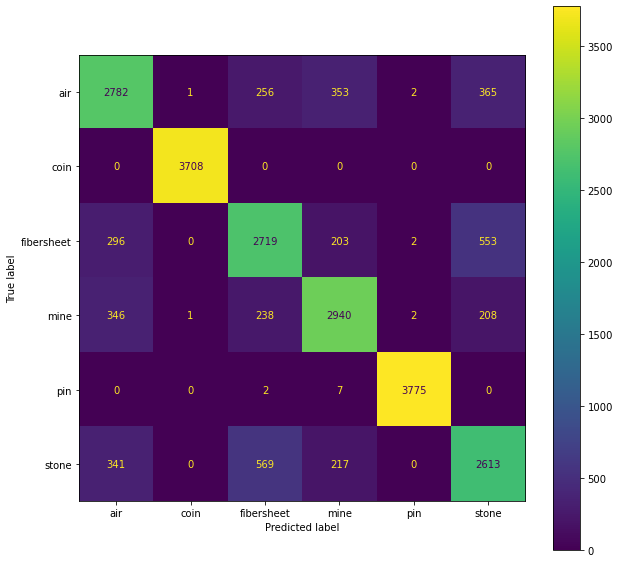

In [495]:
plot_confusion_matrix(clf_positive, Xp_test, yp_test) 


In [455]:
from sklearn import tree
clf_negative = tree.DecisionTreeClassifier()
clf_negative.fit(Xn_train,yn_train)


DecisionTreeClassifier()

In [461]:
yn_pred= clf_negative.predict(Xn_test)
print("************************************ ")
print("Decision Tree Classifier negative waves Accuracy = ",accuracy_score(yn_test, yn_pred)*100)
print("************************************ ")

************************************ 
Decision Tree Classifier negative waves Accuracy =  80.47714285714285
************************************ 


In [422]:
import pickle
filename='negative_shiftandscaled.sav'
pickle.dump(clf_negative, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [462]:
total_tn=[]
total_tp=[]
total_fn=[]
total_fp=[]
dictt={}
sensitivity={}
specificity={}
accuracy={}
for i in classes:
    if len(confusion_matrix(yn_test==i, yn_pred==i)) == 2:
        tn, fp, fn, tp = confusion_matrix(yn_test==i, yn_pred==i).ravel()
        print(tp)
        total_tp.append(tp)
        total_fn.append(fn)
        total_fp.append(fp)
        total_tn.append(tn)
    sensitivity1[i]=tp/(tp+fn)
    specificity1[i]=tn/(tn+fp)
    accuracy1[i]=(tp+ tn)/(tn+tp+fp+fn)

36314
44007
52344
52398
33369
35071


In [463]:
accuracy1

{'air': 0.8980952380952381,
 'mine': 0.9223777777777777,
 'coin': 0.9481650793650793,
 'pin': 0.9610571428571428,
 'stone': 0.9439384126984127,
 'fibersheet': 0.9349238095238095}

In [464]:
sensitivity1

{'air': 0.6906428299733739,
 'mine': 0.7634568042050434,
 'coin': 0.841809702084457,
 'pin': 0.8810635816134638,
 'stone': 0.8323597218252834,
 'fibersheet': 0.8047714285714286}

In [465]:
specificity1

{'air': 0.9396616111576862,
 'mine': 0.9542371944747738,
 'coin': 0.9694515528857449,
 'pin': 0.9770599692367768,
 'stone': 0.9662465001999886,
 'fibersheet': 0.9609542857142858}

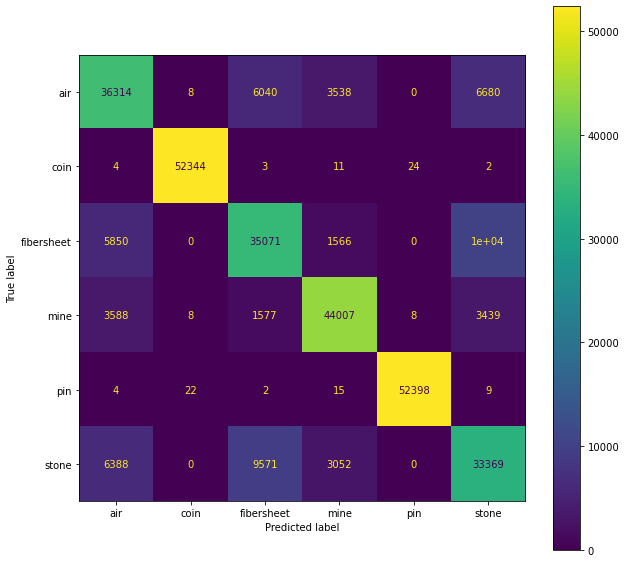

In [466]:
plot_confusion_matrix(clf_negative, Xn_test, yn_test) 

without Augmentation

In [6]:
path = '/home/saad/latest 5.2 data/new' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for a in all_files:
    print(a)
    data=pd.read_csv(a)

    list_cord=list(data.loc[:,'1'])
#     list_cord=list_cord[200:]
    diff=[]
    peak=[]
    peak1=[]
    l_50=[]
    collect={}
    i=57
    peaklen=155
    w=1
    while i <len(list_cord):
        if list_cord[i]>55000:
          
            i_new_start = i-35
            i_new_end = i+120
            peak=list_cord[i_new_start:i_new_end]
            #     peak1=list_cord[i_new_start+g:i_new_end+g]
            # #print(i_new_start,i_new_end)

 
        #print(w)
        #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))
            if len(peak)<peaklen:
                d=peaklen-len(peak)

                for f in range(0,d):
                    peak.append(peak[-1:][0])                
            #print(len(peak),len(peak1),len(peak2),len(peak3),len(peak4),len(peak5),len(peak6),len(peak7),len(peak8),len(peak9),len(peak10))

            collect[w]=peak
            w=w+1
            i=i+165
        i=i+1
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    #dump.iloc[:,:].plot()
    print(dump.shape)
    file_n=all_files[count][-30:].split('/')[-1]
    #print(file_n)
    dump=pd.DataFrame(collect)
    dump=dump.iloc[:,dump.columns!=0]
    
    if file_n.split(".")[0] in metals:
        print("metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/simple/metal/positives//'+file_n,header=False)
        count=count+1
    else:
        print("non-metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/simple/non-metal/positives//'+file_n,header=False)
        count=count+1


/home/saad/latest 5.2 data/new/pin.csv
(155, 2972)
metal
/home/saad/latest 5.2 data/new/air.csv
(155, 3000)
non-metal
/home/saad/latest 5.2 data/new/fibersheet.csv
(155, 3000)
non-metal
/home/saad/latest 5.2 data/new/stone.csv
(155, 3000)
non-metal
/home/saad/latest 5.2 data/new/mine.csv
(155, 4000)
metal
/home/saad/latest 5.2 data/new/coin.csv
(155, 3000)
metal


In [10]:
path = '/home/saad/latest 5.2 data/new' # use your path
all_files = glob.glob(path + "/*.csv")

count=0
for a in all_files:
    print(a)
    data=pd.read_csv(a)

    list_cord=list(data.loc[:,'2'])
    peak=[]
    peak1=[]
    collect={}
    i=65
    peaklen=140
    w=1
    while i <len(list_cord):
        if list_cord[i]>55000:
            i_new_start=i-50
            i_new_end=i+90
            peak=list_cord[i_new_start:i_new_end]
            if len(peak)<peaklen:
                d=peaklen-len(peak)
                for f in range(0,d):
                    peak.append(peak[-1:][0])
            collect[w]=peak
            w=w+1
            i=i+135
        i=i+1
    dump=pd.DataFrame(collect)
    print(dump.shape)
    dump=dump.iloc[:,dump.columns!=0]
    file_n=all_files[count][-30:].split('/')[-1]
    if file_n.split(".")[0] in metals:
        print("metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/simple/metal/negatives//'+file_n,header=False)
        count=count+1
    else:
        print("non-metal")
        pd.DataFrame(collect).to_csv( '/home/saad/latest 5.2 data/simple/non-metal/negatives//'+file_n,header=False)
        count=count+1

/home/saad/latest 5.2 data/new/pin.csv
(140, 3000)
metal
/home/saad/latest 5.2 data/new/air.csv
(140, 3000)
non-metal
/home/saad/latest 5.2 data/new/fibersheet.csv
(140, 3000)
non-metal
/home/saad/latest 5.2 data/new/stone.csv
(140, 3000)
non-metal
/home/saad/latest 5.2 data/new/mine.csv
(140, 4000)
metal
/home/saad/latest 5.2 data/new/coin.csv
(140, 3000)
metal


In [2]:
path_mp = '/home/saad/latest 5.2 data/simple/metal/positives' # use your path
all_files_mp = glob.glob(path_mp + "/*.csv")
path_np = '/home/saad/latest 5.2 data/simple/non-metal/positives' # use your path
all_files_np = glob.glob(path_np + "/*.csv")
path_mn = '/home/saad/latest 5.2 data/simple/metal/negatives' # use your path
all_files_mn = glob.glob(path_mn + "/*.csv")
path_nn = '/home/saad/latest 5.2 data/simple/non-metal/negatives' # use your path
all_files_nn = glob.glob(path_nn + "/*.csv")
df_mp=[]
df_np=[]
df_mn=[]
df_nn=[]
positive_metal={}
negative_metal={}
positive_non={}
negative_non={}
count=0
for i,j in zip(all_files_mp,all_files_mn):
    print(i,j)
    s1=str(all_files_mp[count][-30:].split('/')[-1])
    s2=str(all_files_mn[count][-30:].split('/')[-1])
    print(s1,s2)
    c1=[x for x in classes if s1.split('.')[0] in x][0]
    c2=[x for x in classes if s2.split('.')[0] in x][0]
    print(c1,c2)

    metal_pos=pd.read_csv(i)
    metal_neg=pd.read_csv(j)

    print(metal_pos.shape,metal_neg.shape)

    metal_pos=metal_pos.drop(columns=[metal_pos.columns[0]],axis=1).transpose()
    metal_neg=metal_neg.drop(columns=[metal_neg.columns[0]],axis=1).transpose()
    m_p=[]
    m_n=[]

    for a in range(0,metal_pos.shape[0]):
        m_p.append(c1)
    for a in range(0,metal_neg.shape[0]):
        m_n.append(c2)
    metal_pos['Material']=m_p
    metal_neg['Material']=m_n
    df_mp.append(metal_pos)
    df_mn.append(metal_neg)
    count=count+1
    

count1=0
for i,j in zip(all_files_np,all_files_nn):
    print(i,j)

    non_pos=pd.read_csv(i)
    non_neg=pd.read_csv(j)
    s3=str(all_files_np[count1][-30:].split('/')[-1])
    s4=str(all_files_nn[count1][-30:].split('/')[-1])
    print(s3,s4)
    c3=[x for x in classes if s3.split('.')[0] in x][0]
    c4=[x for x in classes if s4.split('.')[0] in x][0]
    print(c3,c4)
    non_pos=non_pos.drop(columns=[non_pos.columns[0]],axis=1).transpose()
    non_neg=non_neg.drop(columns=[non_neg.columns[0]],axis=1).transpose()

    m_p=[]
    m_n=[]

    for a in range(0,non_pos.shape[0]):
        m_p.append(c3)
    for a in range(0,non_neg.shape[0]):
        m_n.append(c4)
    non_pos['Material']=m_p
    non_neg['Material']=m_n

    df_np.append(non_pos)
    df_nn.append(non_neg)

    positive_non={}
    negative_non={}
    count1=count1+1
data_mp=pd.concat(df_mp, axis=0, ignore_index=True)
data_np=pd.concat(df_np,axis=0,ignore_index=True)
data_mn=pd.concat(df_mn,axis=0,ignore_index=True)
data_nn=pd.concat(df_nn,axis=0,ignore_index=True)
print(data_np.shape,data_mp.shape)
print(data_mn.shape,data_nn.shape)
data_fp=pd.concat([data_mp,data_np],axis=0,ignore_index=True)
data_fn=pd.concat([data_mn,data_nn],axis=0,ignore_index=True)

/home/saad/latest 5.2 data/simple/metal/positives/pin.csv /home/saad/latest 5.2 data/simple/metal/negatives/pin.csv
pin.csv pin.csv
pin pin
(154, 2973) (139, 3001)
/home/saad/latest 5.2 data/simple/metal/positives/mine.csv /home/saad/latest 5.2 data/simple/metal/negatives/mine.csv
mine.csv mine.csv
mine mine
(154, 4001) (139, 4001)
/home/saad/latest 5.2 data/simple/metal/positives/coin.csv /home/saad/latest 5.2 data/simple/metal/negatives/coin.csv
coin.csv coin.csv
coin coin
(154, 3001) (139, 3001)
/home/saad/latest 5.2 data/simple/non-metal/positives/air.csv /home/saad/latest 5.2 data/simple/non-metal/negatives/air.csv
air.csv air.csv
air air
/home/saad/latest 5.2 data/simple/non-metal/positives/fibersheet.csv /home/saad/latest 5.2 data/simple/non-metal/negatives/fibersheet.csv
fibersheet.csv fibersheet.csv
fibersheet fibersheet
/home/saad/latest 5.2 data/simple/non-metal/positives/stone.csv /home/saad/latest 5.2 data/simple/non-metal/negatives/stone.csv
stone.csv stone.csv
stone ston

In [3]:
Xp=data_fp.iloc[:,0:-1]
yp=data_fp.iloc[:,-1]
Xn=data_fn.iloc[:,0:-1]
yn=data_fn.iloc[:,-1]

In [4]:
def my_Test_train(X,y,test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42,shuffle=True)
    print(f'Train X = {X_train.shape}\tTrain y = {y_train.shape}\tTest X = {X_test.shape}\tTest y = {y_test.shape}')
    return (X_train, X_test, y_train, y_test)

In [6]:
x_train,x_test,y_train,y_test=my_Test_train(Xp,yp,0.2)

Train X = (15177, 154)	Train y = (15177,)	Test X = (3795, 154)	Test y = (3795,)


In [7]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
y_train=np.array(y_train)
x_train=np.array(x_train).astype('float')
x_test=np.array(x_test).astype('float')
y_test=np.array(y_test)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_train.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [8]:
from classifiers import resnet_small
path_p='/home/saad/clean_positive/'

In [9]:
input_shape = x_train.shape[1:]
classifier2=resnet_small.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=True)
# classifier = create_classifier(classifier_name, input_shape, nb_classes, output_directory)

classifier2.fit(x_train, y_train, x_test, y_test, y_true,30,8)

2021-09-24 17:55:59.181471: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-24 17:55:59.315517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1a:00.0
2021-09-24 17:55:59.317306: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1b:00.0
2021-09-24 17:55:59.319060: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:1c:00.0
2021-09-24 17:55:59.320800: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pc

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 154, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 154, 64)      576         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 154, 64)      256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 154, 64)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

2021-09-24 17:56:05.041035: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-09-24 17:56:05.220672: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-09-24 17:56:06.155254: W tensorflow/stream_executor/cuda/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


15177/15177 [==============================] - 39s 3ms/sample - loss: 0.9184 - accuracy: 0.6070 - val_loss: 1.5617 - val_accuracy: 0.5402
Epoch 2/30
15177/15177 [==============================] - 33s 2ms/sample - loss: 0.7120 - accuracy: 0.6915 - val_loss: 1.8305 - val_accuracy: 0.4891
Epoch 3/30
15177/15177 [==============================] - 35s 2ms/sample - loss: 0.6431 - accuracy: 0.7231 - val_loss: 1.3592 - val_accuracy: 0.5149
Epoch 4/30
15177/15177 [==============================] - 35s 2ms/sample - loss: 0.5959 - accuracy: 0.7474 - val_loss: 4.1906 - val_accuracy: 0.3078
Epoch 5/30
15177/15177 [==============================] - 36s 2ms/sample - loss: 0.5825 - accuracy: 0.7544 - val_loss: 1.7613 - val_accuracy: 0.5410
Epoch 6/30
15177/15177 [==============================] - 36s 2ms/sample - loss: 0.5529 - accuracy: 0.7691 - val_loss: 1.9131 - val_accuracy: 0.5296
Epoch 7/30
15177/15177 [==============================] - 35s 2ms/sample - loss: 0.5191 - accuracy: 0.7853 - val_loss

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


,precision,accuracy,recall,duration
0,0.816533,0.712253,0.709041,463.044415


In [10]:
x_train,x_test,y_train,y_test=my_Test_train(Xn,yn,0.2)

Train X = (15200, 139)	Train y = (15200,)	Test X = (3800, 139)	Test y = (3800,)


In [11]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
y_train=np.array(y_train)
x_train=np.array(x_train).astype('float')
x_test=np.array(x_test).astype('float')
y_test=np.array(y_test)
# transform the labels from integers to one hot vectors
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

# save orignal y because later we will use binary
y_true = np.argmax(y_test, axis=1)

if len(x_train.shape) == 2:  # if univariate
    # add a dimension to make it multivariate with one dimension 
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [12]:
from classifiers import resnet_small
path_p='/home/saad/clean_negative/'


In [13]:
input_shape = x_train.shape[1:]
classifier1=resnet_small.Classifier_RESNET(path_p, input_shape, nb_classes, verbose=True,build=True)
# classifier = create_classifier(classifier_name, input_shape, nb_classes, output_directory)

classifier1.fit(x_train, y_train, x_test, y_test, y_true,30,8)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 139, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 139, 64)      576         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 139, 64)      256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 139, 64)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

,precision,accuracy,recall,duration
0,0.84521,0.798158,0.781987,308.638857
